In [19]:

import pandas as pd
import numpy as np
from scipy import stats
import sys
import datetime
import time
import matplotlib.pyplot as plt
%matplotlib inline
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
pd.options.display.float_format = '{:,.6f}'.format

#Userdefined module
from fad_v08 import Get_SandD

def Graph():
    # Create Graph:
    Title = f"x axis up to : {kpi_input[t]}"
    SupTitle = f"{t} - {kpi_input[t]}"

    plt.style.use('seaborn-bright')
    fig, ax1 = plt.subplots(figsize=(20,12))
    ax2 = ax1.twinx()
    fig.suptitle(SupTitle, fontsize=20)
    plt.title(Title,fontsize=15,loc="center")
    ax1.set_ylabel(kpi_input[t],color="b",fontsize=18)
    #plt.legend(loc="upper left",fontsize=20)
    ax1.plot(dfSin_gl[kpi_input[0]],dfSin_gl[td_in["KPI_name"] == kpi_input[t]]["Value"], linewidth=2.0)
    plt.grid()
    ax1.plot(dfSin_gl[kpi_input[0]],dfSin_gl[td_in["KPI_name"] == kpi_input[t]]["Regr_value"], linewidth=0.5,color="red")
    if dfSin_gl[dfSin_gl["spike"] != 0][kpi_input[0]].count() != 0:
        ax2.set_ylabel("spike",color="r",fontsize=18)
        ax2.plot(dfSin_gl[dfSin_gl["spike"] != 0][kpi_input[0]],
                 dfSin_gl[dfSin_gl["spike"] != 0]["spike"],
                 linewidth=0.5,color="red",linestyle="", marker="o",markersize=10)
    #ax.plot(td_in["x-value"],td_in["Diff"], linewidth=2.0)

    #ax.plot(td_in["x-value"],td_in["spikevalue"], linewidth=2.0)

def Pivot_spike():
    #Create spike pivot
    pd.options.display.float_format = '{:,.0f}'.format
    resultspike_pv = pd.pivot_table(resultspike,values="Value",index=["KPI_name","Reason",kpi_input[0]]
                                    #,columns="DateTime"
                                    ,aggfunc=["count"] #"count"]
                                    ,fill_value="0"
                                    ,margins = True, margins_name='Total'
                                   )
    return resultspike_pv

In [20]:
#############################    SPIKE ANALYSIS   #####################################

In [21]:
pd.options.display.float_format = '{:,.4f}'.format
td0 = pd.read_excel("./data/Out/matrix/Testdata_inout_ST.xlsx",sheet_name="inputdata",usecols="B:C")
td2 = td0

                         count
                         Value
KPI_name Reason DateTime      
Total                        0


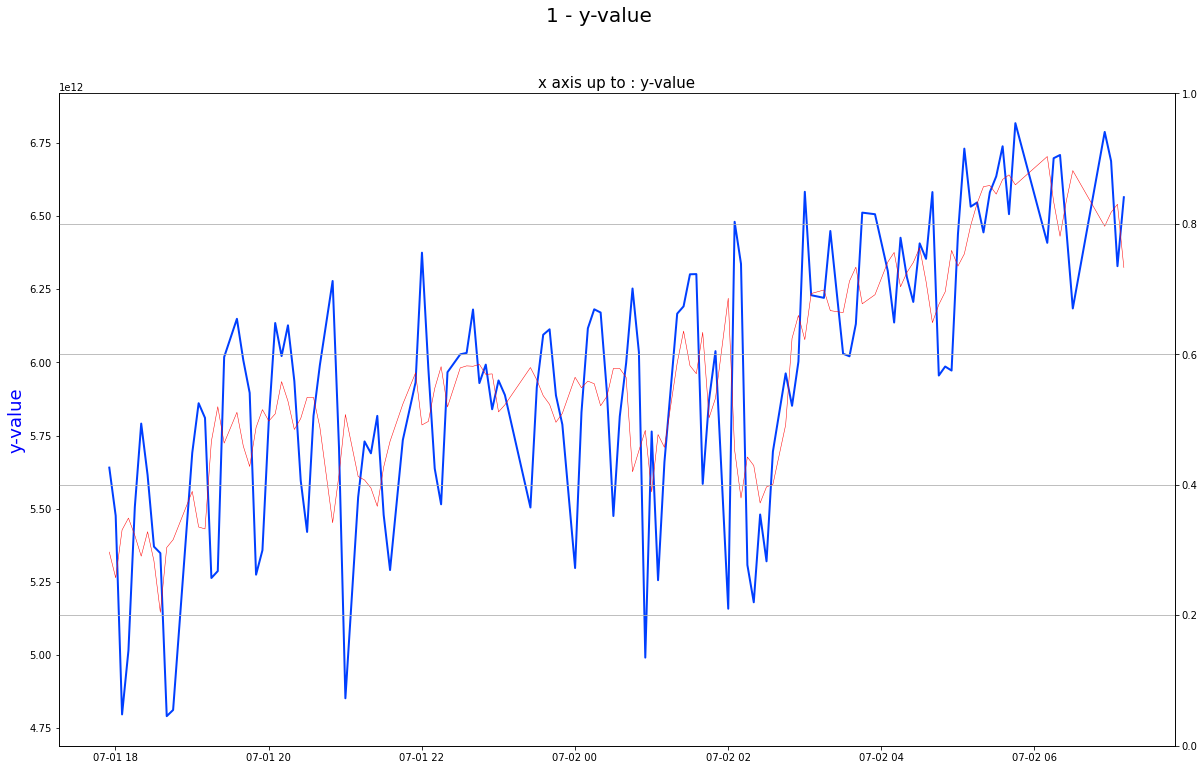

In [34]:
dfWT = pd.DataFrame(pd.read_excel("./data/Out/matrix/Test_hp_ST.xlsx",usecols="B:M",sheet_name="hp"))
writer = pd.ExcelWriter("./data/Out/matrix/Testdata_ST.xlsx")

#td2 = td[-24*12*2:]
td2.reset_index(inplace=True,drop=True)
td2.to_excel(writer,sheet_name="input") 

######################### INITIALIZE DATA   #########################################
kpi_input = td2.columns.to_list()
length = len(td2.columns.to_list())
tstart=1
t=tstart
tend = length
Time_scale=True


##########################  lOOP/CALL MODULE   ###########################################
while t < tend: #len(kpi_input):
    td_in = td2[[kpi_input[0],kpi_input[t]]]
    dfSin_gl, spikelist_gl = Get_SandD(td_in,
                                           acc = dfWT.loc[t-1].iloc[1],
                                           windowsizeleft = dfWT.loc[t-1].iloc[2],
                                           windowsizeright = dfWT.loc[t-1].iloc[3],
                                           sp_name = kpi_input[t],
                                           P1 = dfWT.loc[t-1].iloc[4],
                                           sd = dfWT.loc[t-1].iloc[5],
                                           ignorestartsamples = dfWT.loc[t-1].iloc[6],
                                           ignoreendsamples = dfWT.loc[t-1].iloc[7],
                                           absinc = dfWT.loc[t-1].iloc[8],
                                           step = dfWT.loc[t-1].iloc[9],
                                           mtv = dfWT.loc[t-1].iloc[10],
                                           meaninc = dfWT.loc[t-1].iloc[11],
                                           Timescale = Time_scale
                                          )
    if t == tstart:
        result = dfSin_gl
    else:
        result = pd.concat([result,dfSin_gl])
    if t == tstart:
        resultspike = spikelist_gl
    else:
        resultspike = pd.concat([resultspike,spikelist_gl])
    
    Graph()
    resultspike_pv = Pivot_spike()
    if t%10 == 0:
        print(t)
        #print("output_par : ",output_par)

    t += 1
##########################  END lOOP/CALL MODULE   ###########################################
    
# write data to excel
result.to_excel(writer,sheet_name="results")  
resultspike.to_excel(writer,sheet_name="resultsspike") 
writer.save()
print(resultspike_pv)

In [33]:
x = resultspike.index.to_list()
for item in x:
    print(item)
    td2 = td2.drop(td_in.index[item], axis = 0)

133


In [ ]:
#td2 = td2.drop(td_in.index[0], axis = 0)

In [ ]:
len(td2)